In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

## K-Medoids

In [2]:
# Inportando base de dados
iris = datasets.load_iris()

In [4]:
# Criando modelo de treinamento e teste
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
cluster.get_medoids()

# Executando algoritimo
cluster.process()

In [5]:
# Verificando dados previstos
previsoes = cluster.get_clusters()
previsoes

[[7,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106],
 [67,
  53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [112,
  50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148]]

In [6]:
# Medoids, pontos centrais dos clusters
medoides = cluster.get_medoids()
medoides

[7, 67, 112]

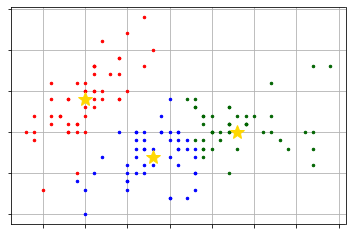

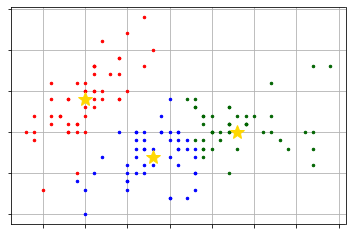

In [7]:
# Variavel para visualização do cluster
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:, 0:2])
v.append_cluster(medoides, data = iris.data[:, 0:2], marker = '*', markersize = 15)
v.show()

In [10]:
# Pegando valores preditos e reais
lista_real = []
lista_previsoes = []

for i in range(len(previsoes)):
    print('-----')
    print(i)
    print('-----')
    for j in range(len(previsoes[i])):
        print(previsoes[i][j])
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

-----
0
-----
7
0
1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
106
-----
1
-----
67
53
55
57
59
60
61
62
63
64
66
68
69
70
71
72
73
78
79
80
81
82
83
84
85
87
88
89
90
91
92
93
94
95
96
97
98
99
101
113
114
119
121
123
126
127
133
134
138
142
146
149
-----
2
-----
112
50
51
52
54
56
58
65
74
75
76
77
86
100
102
103
104
105
107
108
109
110
111
115
116
117
118
120
122
124
125
128
129
130
131
132
135
136
137
139
140
141
143
144
145
147
148


In [11]:
# Convertendo estrutura de dados para confusion_matrix
lista_real = np.asanyarray(lista_real)
lista_previsoes = np.asarray(lista_previsoes)

# Gerando matriz de confusão
confusao = confusion_matrix(lista_real, lista_previsoes)
confusao

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 1, 14, 35]])